In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
y = df['Species']
X = df.drop(['Id','Species'],axis=1)

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Accuracy score before PCA",knn_pca.score(X_test_new,y_test),"%")

Accuracy score before PCA 0.9333333333333333 %


In [ ]:
pca = PCA(n_components=4)
X_transform = pca.fit_transform(X_std)

In [ ]:
X_transform

In [ ]:
explained_var = pca.explained_variance_ratio_
explained_var

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

0.7277045209380132
0.2303052326768065
0.03683831957627398
0.005151926808906312


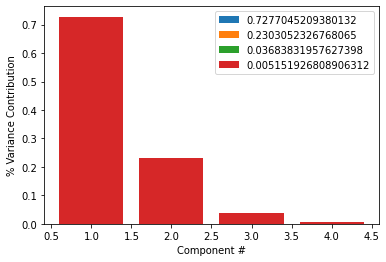

In [ ]:
for var in explained_var:
	print(var)
	plt.bar([1,2,3,4],explained_var,label=var)
	plt.xlabel("Component #")
	plt.ylabel("% Variance Contribution")
	plt.legend()
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_std)

In [ ]:
X_transform

In [ ]:
pca1 = list(zip(*X_transform))[0]
pca2 = list(zip(*X_transform))[1]

In [ ]:
pca1

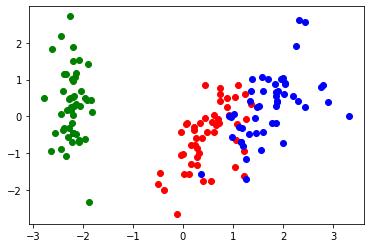

In [ ]:
color_dict = {}

color_dict["Iris-setosa"] = "green"
color_dict["Iris-versicolor"]='red'
color_dict["Iris-virginica"] = 'blue'

i=0
for label in labels.values:

	plt.scatter(pca1[i],pca2[i],color=color_dict[label])
	i=i+1

plt.show()	

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_transform, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Accuracy score after PCA",knn_pca.score(X_test_new,y_test),"%")

Accuracy score after PCA 0.8666666666666667 %
